<a href="https://colab.research.google.com/github/sgulyano/mat202/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT-202 Lab 3: Image Transformation

CMKL University

By Sarun Gulyanon


### Goal

Introduce students to the fundamental concepts of geometric transformations in image processing.

### Outline

In this lab, students will learn the basics of geometric transformations and explore how to manipulate the spatial structure of images through operations such as translation, rotation, scaling, and flipping.


### References
- OpenCV: https://docs.opencv.org/5.x/d9/df8/tutorial_root.html


----

## 1. Geometric Transformation

Geometric Transformation are operations that change the spatial relationship of pixels in an image.

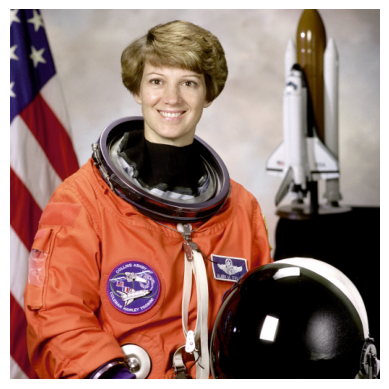

In [1]:
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt
%matplotlib inline


#@title Select Image {run: 'auto'}
image_name = 'astronaut' #@param ['astronaut', 'camera', 'cat', 'coffee', 'checkerboard', 'page']

image = getattr(data, image_name)()

if image.ndim < 3:
    plt.imshow(image, cmap='gray')
else:
    plt.imshow(image)
plt.axis('off')
plt.show()


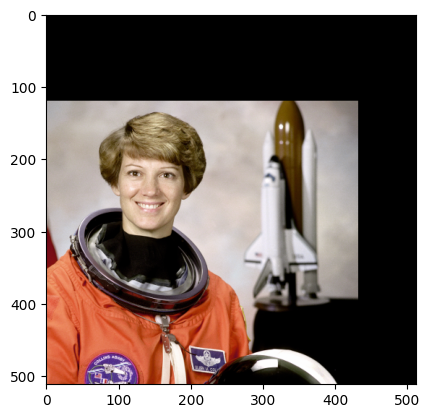

In [2]:
#@title Translation {run: 'auto'}
X = -80 #@param {type:"slider", min:-200, max:200, step:10}
Y = 120 #@param {type:"slider", min:-200, max:200, step:10}

translation_matrix = np.array([
    [1, 0, X],
    [0, 1, Y],
    [0, 0, 1]
], dtype=np.float32)

dst = cv2.warpAffine(image, translation_matrix[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

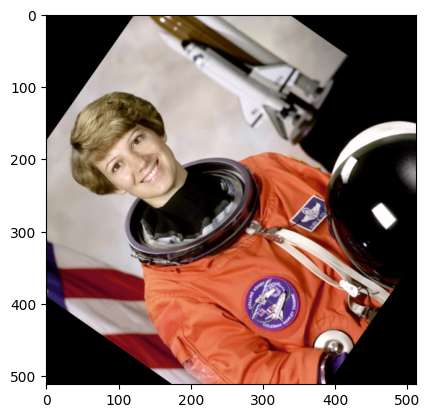

In [3]:
#@title Rotation {run: 'auto'}
angle = 55 #@param {type:"slider", min:0, max:360, step:5}

center = (image.shape[1]//2, image.shape[0]//2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1)
rotate_matrix = np.concatenate((rotate_matrix, [[0, 0, 1]]), axis=0)

dst = cv2.warpAffine(image, rotate_matrix[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

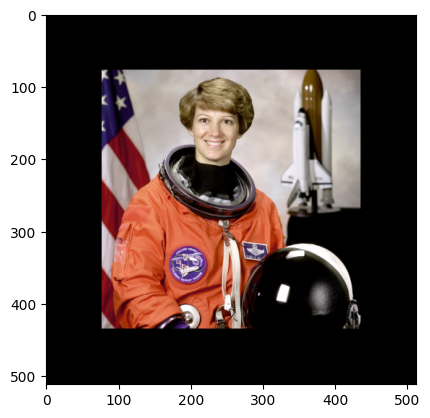

In [4]:
#@title Uniform Scaling {run: 'auto'}
scale = 0.7 #@param {type:"slider", min:0.5, max:2, step:0.1}

center = (image.shape[1]//2, image.shape[0]//2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=0, scale=scale)
rotate_matrix = np.concatenate((rotate_matrix, [[0, 0, 1]]), axis=0)

dst = cv2.warpAffine(image, rotate_matrix[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

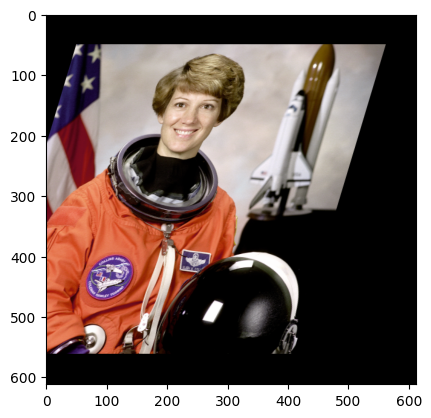

In [5]:
#@title Shearing {run: 'auto'}
sh_x = -0.3 #@param {type:"slider", min:-1, max:1, step:0.1}
sh_y = 0 #@param {type:"slider", min:-1, max:1, step:0.1}

shearing_matrix = np.array([
    [1, sh_x, 50],
    [sh_y, 1, 50],
    [0, 0, 1]
], dtype=np.float32)

dst = cv2.warpAffine(image, shearing_matrix[:2], (image.shape[1]+100, image.shape[0]+100))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

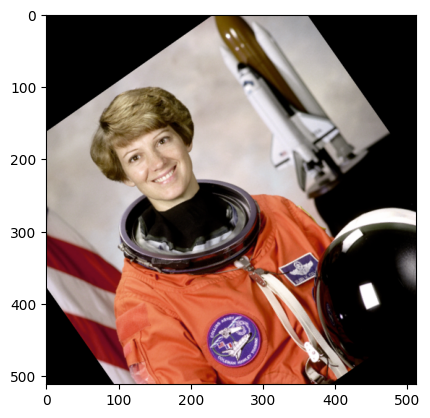

In [6]:
#@title Affine Transformation {run: 'auto'}
angle = 35 #@param {type:"slider", min:0, max:360, step:5}
scale = 1 #@param {type:"slider", min:0.5, max:2, step:0.1}
X = 0 #@param {type:"slider", min:-200, max:200, step:10}
Y = 40 #@param {type:"slider", min:-200, max:200, step:10}
sh_x = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
sh_y = 0 #@param {type:"slider", min:-1, max:1, step:0.1}

center = (image.shape[1]//2, image.shape[0]//2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=angle, scale=scale)
rotate_matrix = np.concatenate((rotate_matrix, [[0, 0, 1]]), axis=0)

translation_matrix = np.array([
    [1, 0, X],
    [0, 1, Y],
    [0, 0, 1]
], dtype=np.float32)

shearing_matrix = np.array([
    [1, sh_x, 0],
    [sh_y, 1, 0],
    [0, 0, 1]
], dtype=np.float32)

aff_mat = translation_matrix @ rotate_matrix @ shearing_matrix

dst = cv2.warpAffine(image, aff_mat[:2], (image.shape[1], image.shape[0]))

if image.ndim < 3:
    plt.imshow(dst, cmap='gray')
else:
    plt.imshow(dst)
plt.show()

How to Compute an Affine Transformation from Point Correspondence

Affine Transformation Matrix:
 [[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


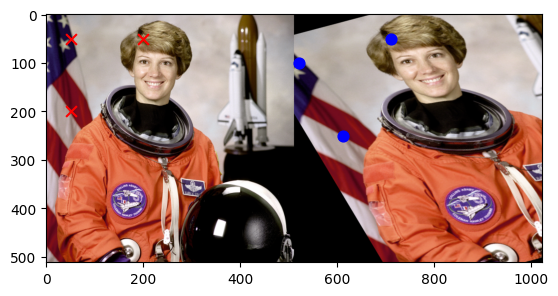

In [7]:
if image.ndim == 3:
    rows, cols, _ = image.shape
else:
    rows, cols = image.shape

# Define 3 points from the original image
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])

# Define the corresponding points in the output image
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Compute affine transformation matrix
M = cv2.getAffineTransform(pts1, pts2)
print("Affine Transformation Matrix:\n", M)

# Apply the affine transformation
dst = cv2.warpAffine(image, M, (cols, rows))

# Show correspondence
img2 = np.concatenate((image, dst), axis=1)
plt.imshow(img2, cmap='gray')
plt.scatter(pts1[:,0], pts1[:,1], c="r", s=60, marker="x", label="Source Points")
plt.scatter(pts2[:,0]+cols, pts2[:,1], c="b", s=60, marker="o", label="Destination Points")

# 2. Forward/Backward Image Warping
- **Forward Warping**: Each pixel in the source image is mapped to a new location in the output image based on the transformation. This can leave gaps (holes) in the output because not every target pixel is assigned a value.

- **Backward Warping**: Each pixel in the output image is mapped back to a location in the source image to sample its value. This avoids holes but requires interpolation when the mapped coordinates are not integers.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_affine_transformation_matrix(theta=0, scale=0, translation_x=0, translation_y=0):
    """
    Return Affine Transformation Matrix that performs rotation, scaling, and translation
    Input:  theta = degree of rotation in radians
            scale = scaling ratio
            translation_x = translation in X-axis in pixels
            translation_y = translation in Y-axis in pixels
    Output: the corresponding 2D array affine transformation matrix
    """
    T = np.array([[scale * np.cos(theta), -scale * np.sin(theta), translation_x],
                  [scale * np.sin(theta), scale * np.cos(theta), translation_y],
                  [0, 0, 1]])
    return T

def get_new_coordinate(T, img):
    """
    Compute the new coordinates of each pixel in img after the transformation T
    Input:  T = trasnformation matrix
            img = image
    Output: coord_out = the new coordinate of of each pixel in img (nx2 array)
    """
    xx, yy = np.meshgrid(range(len(img[0])), range(len(img)))
    coord_in = np.stack((xx.ravel(), yy.ravel(), np.ones((xx.size))))
    coord_out = (T @ coord_in).astype('int')
    return coord_out

def forward_transform(img, d=0, s=1, dx=0, dy=0):
    """
    Perform forward transformation
    Input:  img = image
            d = rotation degree in radian
            s = scaling ratio
            dx = translation in X-axis in pixels
            dy = translation in Y-axis in pixels
    Output: img_transformed = image after forward transformation
    """
    T = get_affine_transformation_matrix(d, s, dx, dy)
    coord_out = get_new_coordinate(T, img)
    img_transformed = np.ones((1500, 1500, 3), dtype=np.uint8)*255
    img_transformed[coord_out[1], coord_out[0], :] = img.reshape((-1,3))
    return img_transformed

def backward_transform(img, d=0, s=1, dx=0, dy=0):
    """
    Perform backward transformation
    Input:  img = image
            d = rotation degree in radian
            s = scaling ratio
            dx = translation in X-axis in pixels|
            dy = translation in Y-axis in pixels
    Output: img_transformed = image after backward transformation
    """
    T = get_affine_transformation_matrix(d, s, dx, dy)
    T_inv = np.linalg.inv(T)
    img_transformed = np.ones((1500, 1500, 3), dtype=np.uint8)*255
    coord_inv = get_new_coordinate(T_inv, img_transformed)
    coord_inv_bound = np.around(coord_inv)
    idx = (coord_inv_bound[1] >= 0) & (coord_inv_bound[1] < len(img)) & (coord_inv_bound[0] >= 0) & (coord_inv_bound[0] < len(img[0]))
    idx2d = idx.reshape(img_transformed.shape[:-1])
    img_transformed[idx2d,:] = img[coord_inv_bound[1, idx], coord_inv_bound[0, idx], :]
    return img_transformed

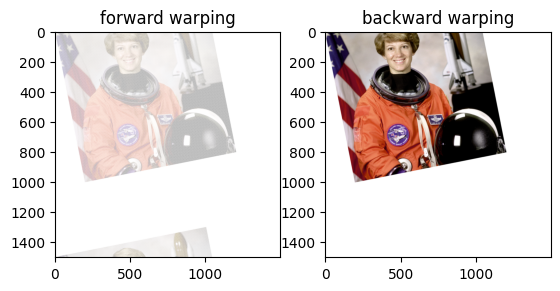

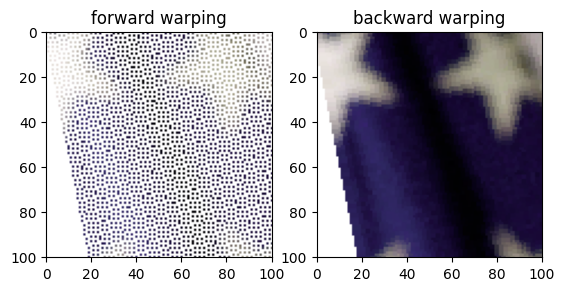

In [9]:
img_forward_transformed = forward_transform(image, d=-np.pi/16, s=2, dy=0, dx=0)
img_backward_transformed = backward_transform(image, d=-np.pi/16, s=2, dy=0, dx=0)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_forward_transformed)
plt.title('forward warping')
plt.subplot(1,2,2)
plt.imshow(img_backward_transformed)
plt.title('backward warping')
plt.show()

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img_forward_transformed)
plt.title('forward warping')
plt.xlim([0,100])
plt.ylim([100,0])
plt.subplot(1,2,2)
plt.imshow(img_backward_transformed)
plt.title('backward warping')
plt.xlim([0,100])
plt.ylim([100,0])
plt.show()

----